**Table of contents**<a id='toc0_'></a>    
- [TUTORIAL FOR PYGEMMES](#toc1_)    
  - [Python for R user](#toc1_1_)    
    - [Navigating with the objects](#toc1_1_1_)    
      - [Dictionnary](#toc1_1_1_1_)    
      - [Libraries, numpy](#toc1_1_1_2_)    
- [Pygemmes, modules, models, concepts and aggregates](#toc2_)    
  - [Paul Valcke](#toc2_1_)    
    - [EJP internal workshop](#toc2_1_1_)    
  - [Before everything : Import](#toc2_2_)    
  - [What is Pygemmes ?](#toc2_3_)    
  - [pgm toolkit (before hub)](#toc2_4_)    
  - [Map of the library](#toc2_5_)    
  - [The "get" methods](#toc2_6_)    
    - [Get available models](#toc2_6_1_)    
  - [DOING THE REAL STUFF](#toc2_7_)    
    - [What is the hub initialization doing ?](#toc2_7_1_)    
    - [Doing a run without changing values](#toc2_7_2_)    
    - [The basic plot : temporal, grouped by units](#toc2_7_3_)    
    - [GET ACCESS TO DATA](#toc2_7_4_)    
      - [Technical point : the data shape](#toc2_7_4_1_)    
    - [Access to plots already existing](#toc2_7_5_)    
    - [Presets !](#toc2_7_6_)    
    - [THE INFAMOUS SET_DPARAM](#toc2_7_7_)    
  - [Convergence rate and valleys of stability](#toc2_8_)    
  - [SHOCKS](#toc2_9_)    
- [Your turn !](#toc3_)    
  - [Running the system on your own](#toc3_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[TUTORIAL FOR PYGEMMES](#toc0_)

This document is a *notebook*, a document mixing : 
* Markdown (press M on a cell to transform it, add equations, images...)
* Code cells (press Y)
* Terminal output under code cells 

## <a id='toc1_1_'></a>[Python for R user](#toc0_)

* In python, the first index is 0 
* In python, everything is an object with methods
* To access available extensions of an object, use tab 
* To access docstring of an object, use `object?` 
* Comments with `# blablabla` 
* Strings with 
### <a id='toc1_1_1_'></a>[Navigating with the objects](#toc0_)
#### <a id='toc1_1_1_1_'></a>[Dictionnary](#toc0_)

In [ ]:
dict1= {'key1' : 'value1',
        'key2' : 'value2',
        #[...]
        }
dict1['key3'] = 'value3'

k     = dict1.keys()
v     = dict1.values()

# **dict1 to unpack 
print(k,v)

In [ ]:
# If you have a dictionnary of dictionnary of dictionnary : 
dict0 = { 'firstdict' : { 'second':'Hello !' },
          'else' : ['hello','test',0],      
                }
print(dict0['firstdict']['second'])
print(dict0['else'][1])

#### <a id='toc1_1_1_2_'></a>[Libraries, numpy](#toc0_)

In [ ]:
import numpy # importing a library
import numpy as np # importing and renaming 

np.random.uniform # is an object
np.random.uniform() # is the execution of the object

x = np.zeros((5,3,2,2)) # creating a 4-dimensional array 
print(x[1,0,0,-1])      # -1 is the last element (-2 before etc)
print(30*'###')
print(x[0,...,-1])      # ... for all elements in the middle dimensions
print(30*'###')
print(x[:,0,0,0])       # : is the whole dimension
print(30*'###')
print(x[2:,...])        # 2: if from the second element up to the end 
print(30*'###')
print(x[:-2,...])       # :-2 all elements up to the last

x[0,:]=1 
print(x)


# <a id='toc2_'></a>[Pygemmes, modules, models, concepts and aggregates](#toc0_)

## <a id='toc2_1_'></a>[Paul Valcke](#toc0_)

### <a id='toc2_1_1_'></a>[EJP internal workshop](#toc0_)

The goal of this session is : 
1. pygemmes can run on your computer
2. You know what are the properties of `pgm` and `hub`, how they work
3. You know how to :
    * get the knowledge of what is available
    * load the model you want, with a preset if you want
    * modify parameters and conditions
    * run simulations
    * do deeper analysis
    * plot data
4. You can write your own model

## <a id='toc2_2_'></a>[Before everything : Import](#toc0_)

* **pygemmes** can be downloaded on https://github.com/DaluS/GEMMES (branch : devel). The repo is private you need to give me your github pseudo to get it. 
* your python must know where to load the library, either define your "GEMMES" folder as original path, or execute the line under it.

you will need the following library : numpy, scipy, matplotlib, pyvis 


In [1]:
import sys 

# Install all dependencies
#!{sys.executable} -m pip install numpy pandas ipywidgets matplotlib plotly scipy pyvis jupyter inspect functools
#! pip install itables ipympl pylatexenc

# Change path as the folder adress you have put the library in 
path = "C:\\Users\\Paul Valcke\\Documents\\GitHub\\GEMMES" 
sys.path.insert(0, path)
import pygemmes as pgm

############# MISC IMPORTS ###############
from itables import init_notebook_mode
import itables.options as opt
init_notebook_mode(all_interactive=True)

#%matplotlib widget
from IPython.display import display,HTML,Markdown
from IPython.display import IFrame

opt.columnDefs = [{"className": "dt-left", "targets": "_all"}]
opt.classes="display nowrap compact"
opt.scrollY="500px"
opt.scrollCollapse=True
opt.paging=False


pyIDEE

* Version 0.9
* Last update 2023/01/03
* Developped at the environmental justice program https://environmentaljustice.georgetown.edu/#
* Contact : Paul Valcke pv229@georgetown.edu

Welcome in PyIDEE, a modular library to prototype and study dynamical systems !
This library is oriented toward generation of macroeconomic complexity models

If you find bugs, want some new extensions, or help us improve the library, please create a new issue on github
If this is the first time you open this library, please look at the tutorial file in doc/tutorial.py or better, and execute it line by line.

The ipythonNotebook is at : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\doc\TUTORIALS\TUTORIAL.ipynb
If you want to customize pyIDEE (advancer users) like removing this message, edit : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_config.py


<IPython.core.display.Javascript object>

## <a id='toc2_3_'></a>[What is Pygemmes ?](#toc0_)

A differential system solver with "extra steps" :
* library of models
* Easy model creation, modification, coupling, tweaking 
* Automatic space allocation, resolution order
* Model summary, representation...
* Plots, analysis of cycles, sensibility


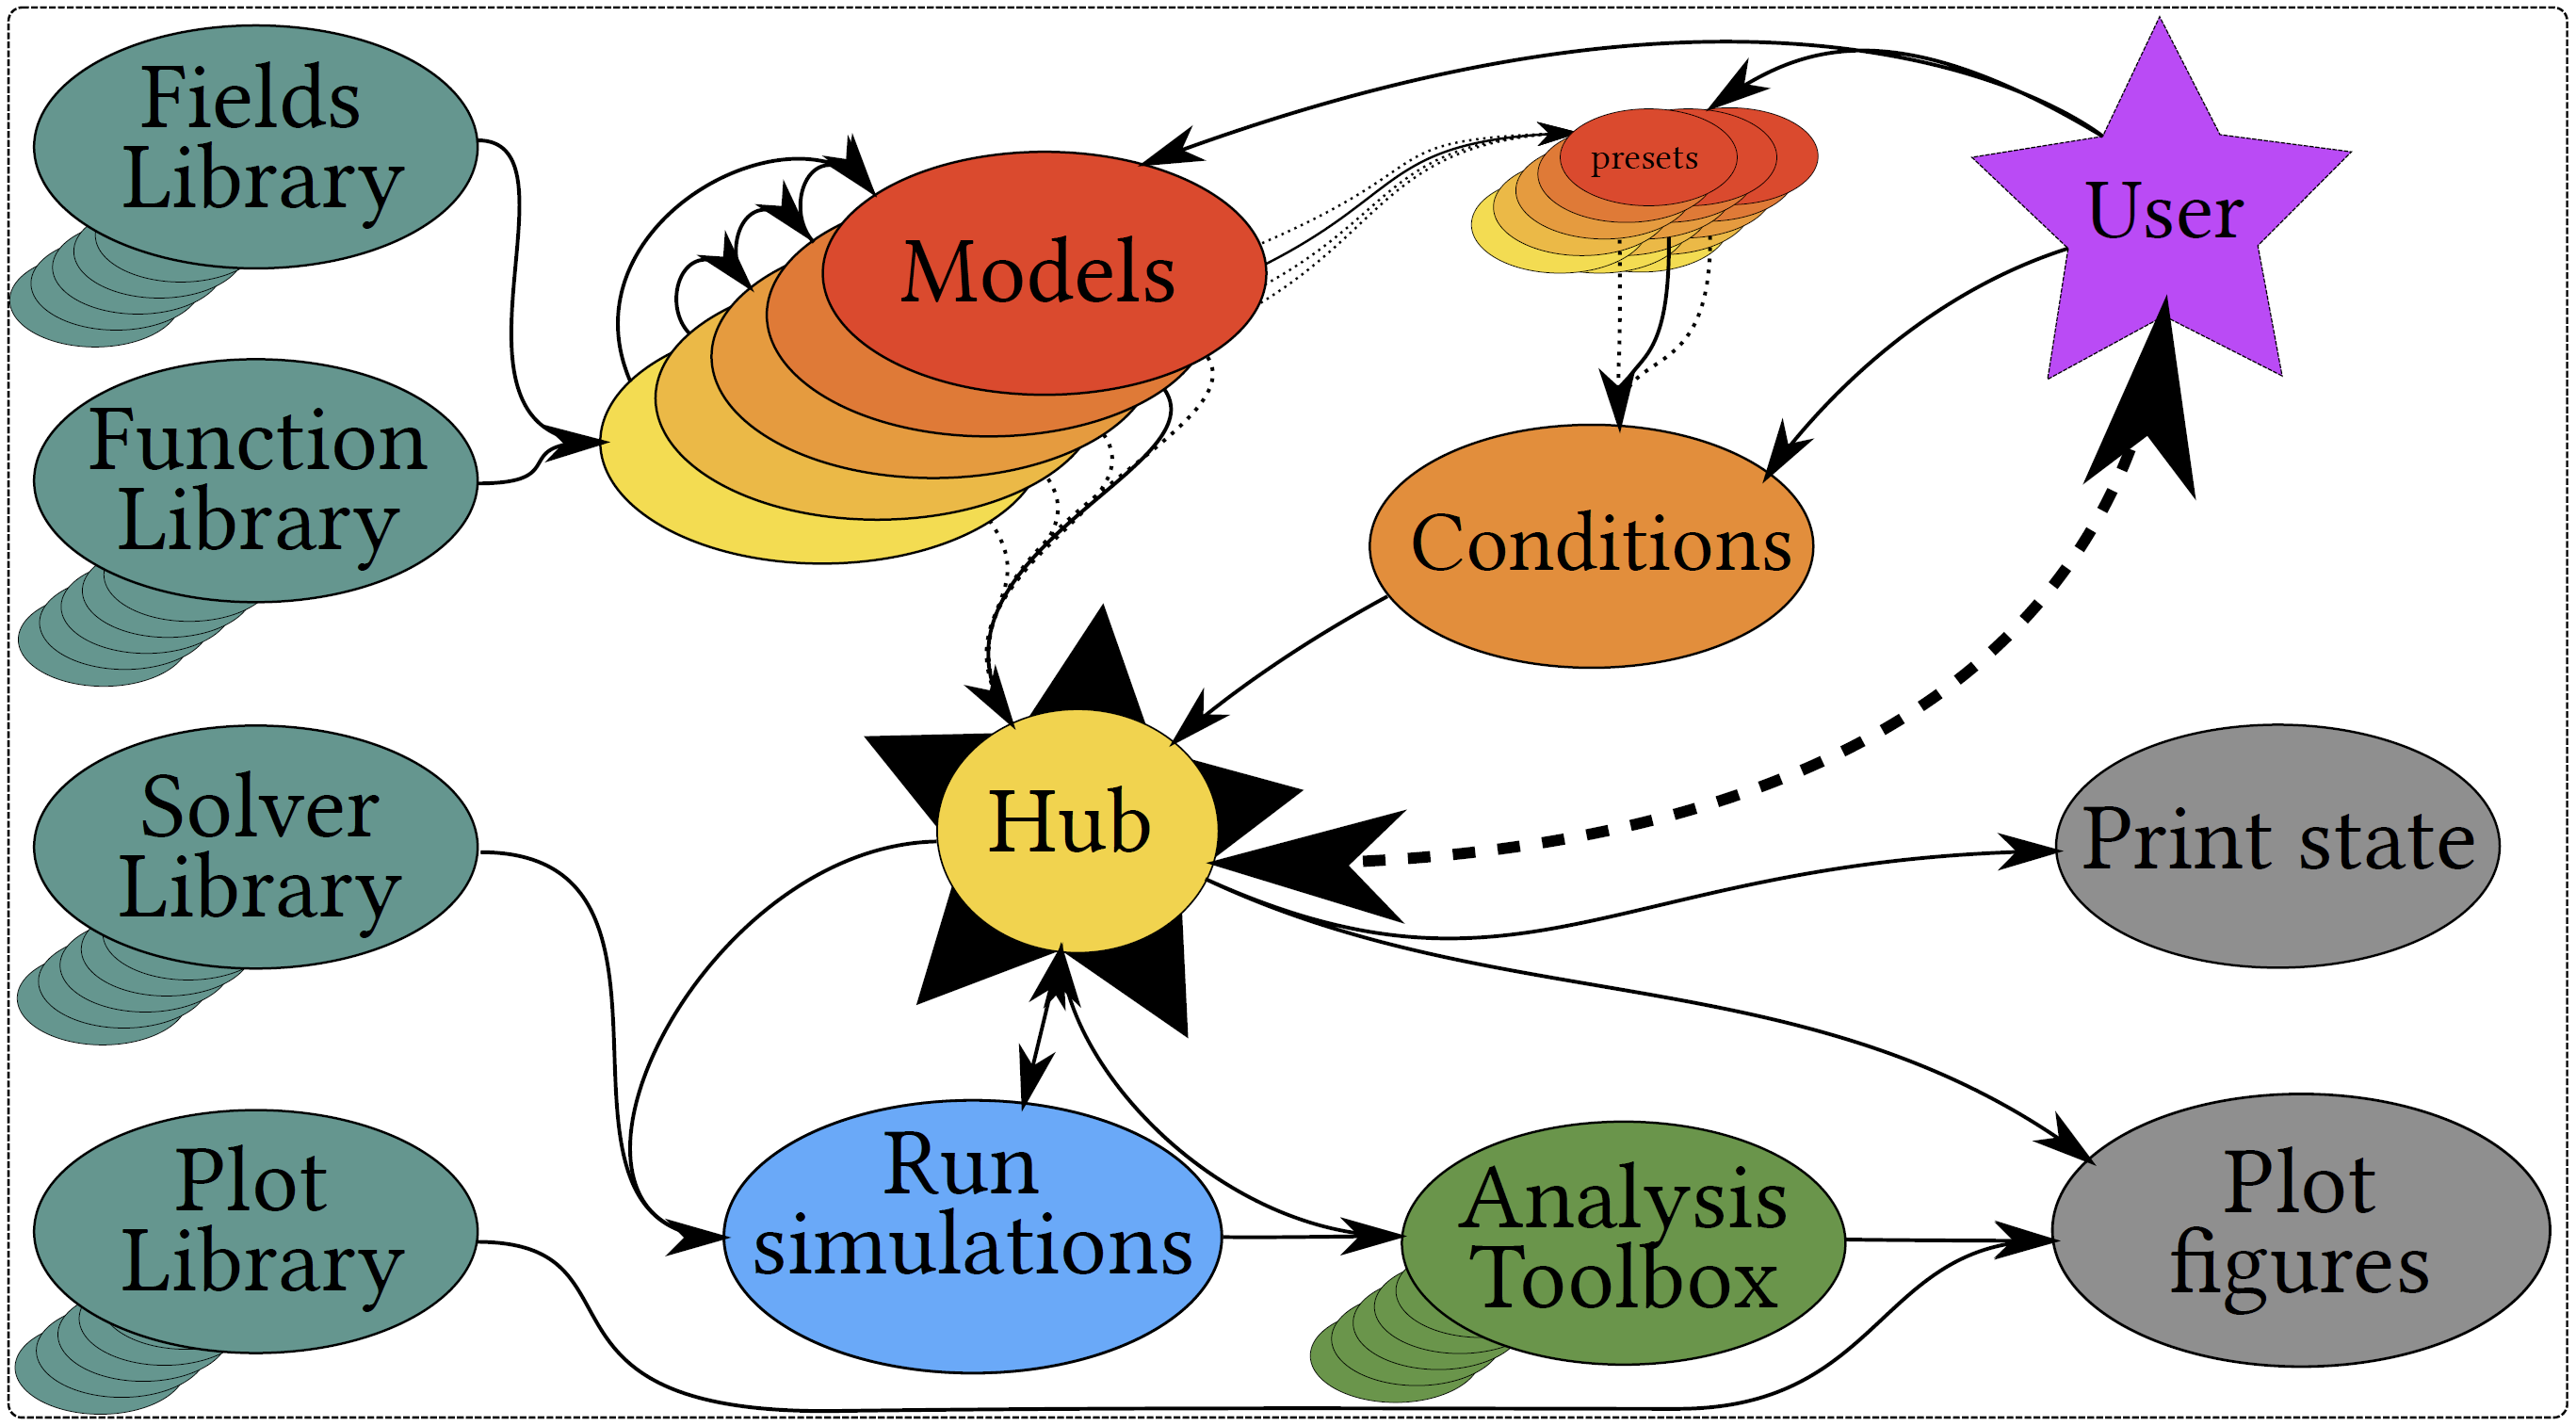

## <a id='toc2_4_'></a>[pgm toolkit (before hub)](#toc0_)

**ALWAYS USE TAB, AUTOINDENTATION, HELP( ), ? When exploring a library**

In [ ]:
help(pgm)

## <a id='toc2_5_'></a>[Map of the library](#toc0_)

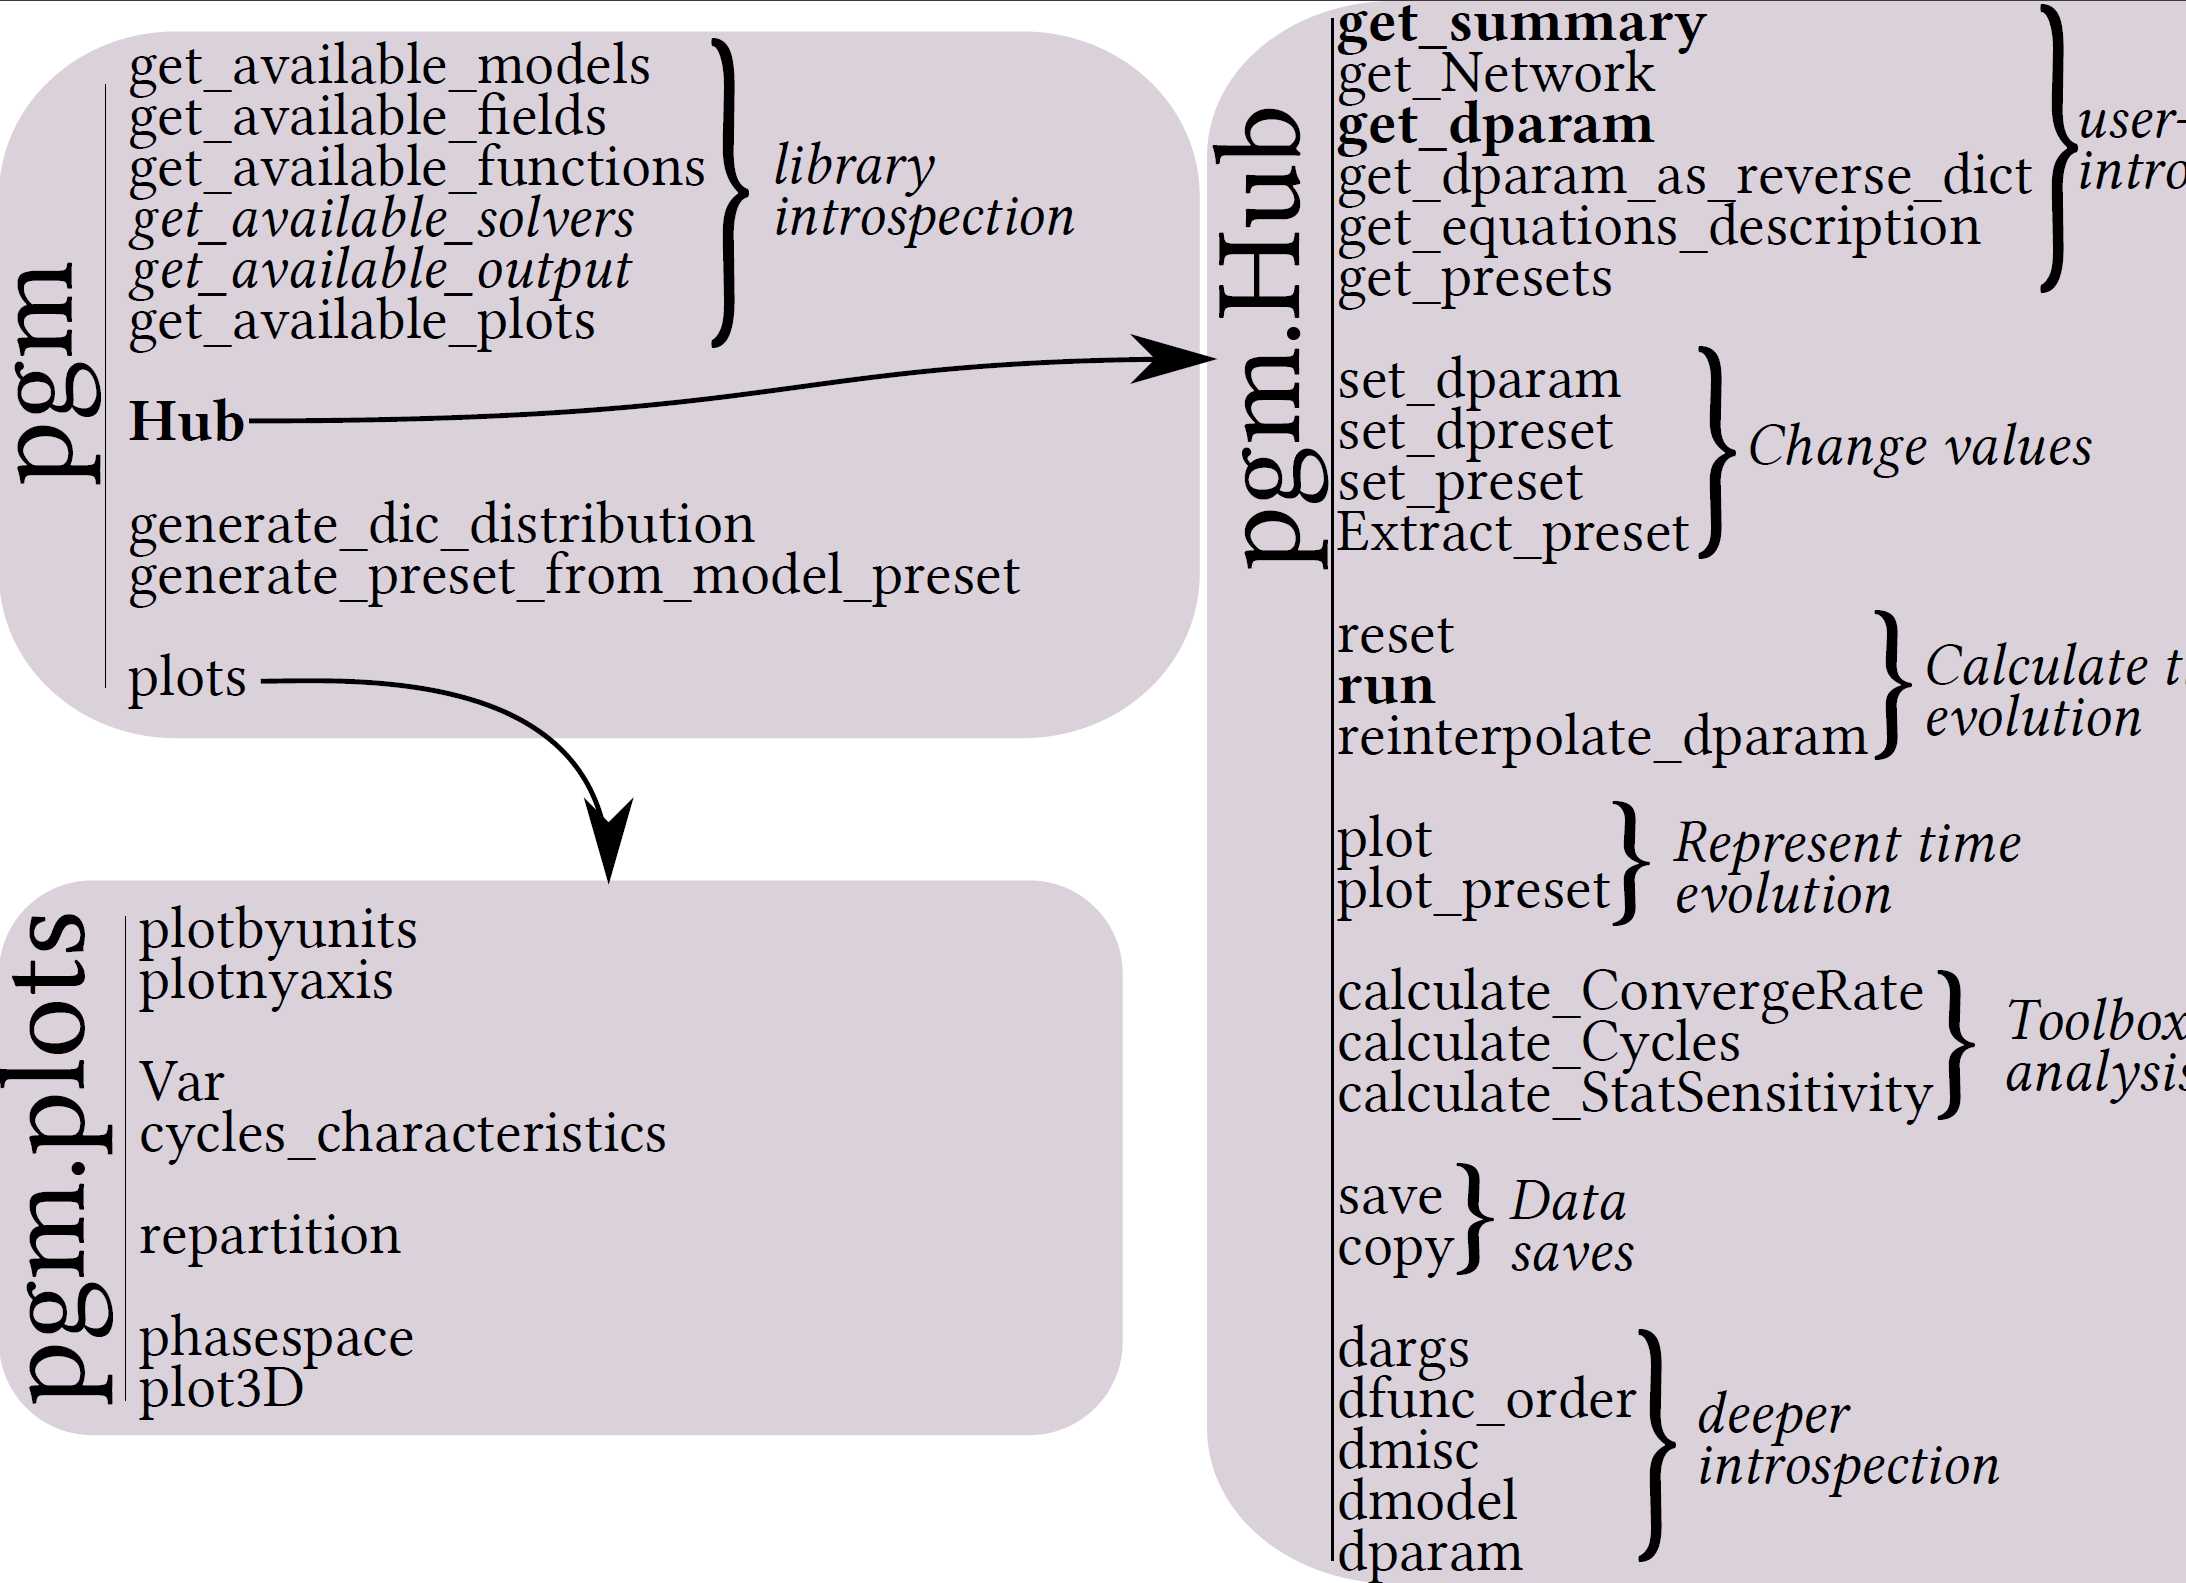

## <a id='toc2_6_'></a>[The "get" methods](#toc0_)
A lot of things are already coded in pygemmes so that you do not have to code them. There are multiple categories : 
* **Model files**, containing the endogenisation loops of your system (the equations), an ensemble of preset of values and associated plots
* **solvers**, to do temporal run of your set of equations 
* **fields**, an ensemble of definitions and basic value that can be shared through models (units, symbol, definitions, default values...) 
* **functions**, an ensemble of equations linking fields that can be called easily (a Philips curve, a population growth...)
* **plot**, an ensemble of custom-made plots that can be called easily for this architecture
* **output**, an ensemble of presaved runs (disactivated in 0.9)

### <a id='toc2_6_1_'></a>[Get available models](#toc0_)
Those model are already coded, and have preset and plots associated to them ! 
You can use them directly to see what other modellers have done, 

In [ ]:
pgm. # FILL THE CELL !

In [ ]:
pgm.get_available_models()
lmodel = pgm.get_available_models(Return=dict).keys()

In [ ]:
Markdown(pgm.get_available_model_documentation('CHIMES0'))

In [ ]:
pgm.get_available_fields()

## <a id='toc2_7_'></a>[DOING THE REAL STUFF](#toc0_)

Now we will load a model, and see what we can do with it

The **MOST IMPORTANT** element of pygemmes is the **Hub**. You will call it with a model inside of it, then interact with the model through the Hub.

In [ ]:
help(pgm.Hub)

A model is : 
* an ensemble of fields, quantities describing physical or informational values (temperature, employment)
* an equation associated to each of the field, determining its value over time, and how each fields are related to each others

there are three categories of possible equations : 
* **parameter :** the value is a constant (example, the gravitational constant, or the size of Mount Everest in a short-run simulation)
* **state variable :** the value is fully determined by every other fields ( the employment is determined by the quantity of workers and the population able to work, two other fields)
* **differential variables :** the variation of the value is a state variable : think about stock and flows : the variation of the stock is computed through the sum of the flow

It is possible that a same field is a parameter in some model (exogenous, constant), a state variable in other (instant adaptation), or a differential in others 

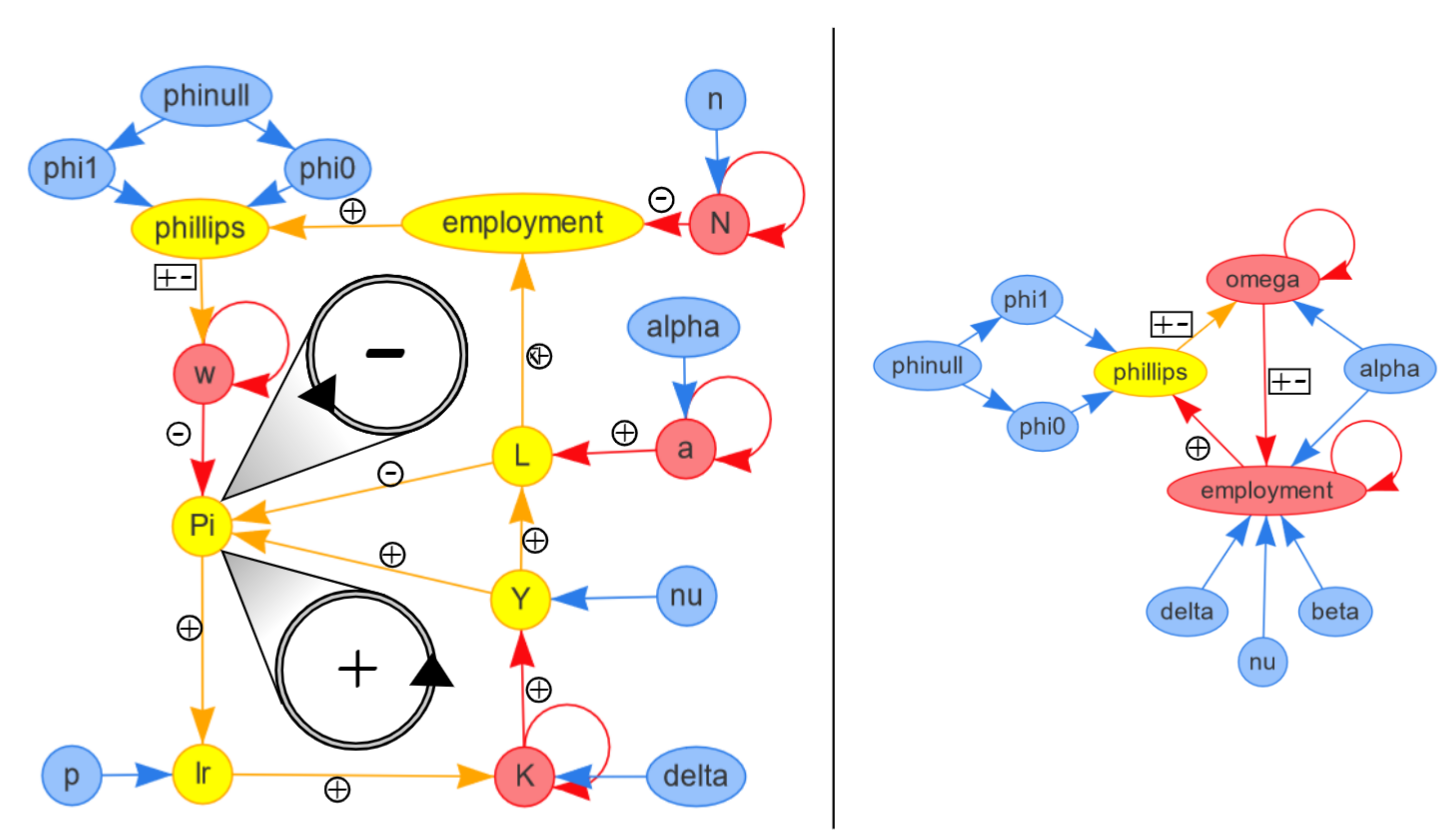

Here parameters are in blue, state variable yellow, differential variable in red. 
An simple criteria to know if it is an interesting model is "a model with loop in it, both positive and negative". 
On the left, the system is a Goodwin will its "extensive" equations, and on the right the dynamics on the phase-space. Both will solve the same overall thing

### <a id='toc2_7_1_'></a>[What is the hub initialization doing ?](#toc0_)

* Find what are all the fields that exist in the system
* Determine if they are differential, state variable, parameters
* Try to find as many existing information as possible (typically in a file called `_def_fields`) that has not been put by the model creator but exist in a common database. It can be :
    * units 
    * symbol
    * definition 
    * default value
    * ...
* Find an order to calculate the system at each timestep, and what variables are necessary (in loops)
* Preparing allocation for future time calculation
* A bit of coffee

In [ ]:
hub=pgm.Hub('GK')

In [ ]:
hub.get_summary()  # definition concern the field definition, com the way it is calculated

In [ ]:
hub.get_fieldsproperties()

In [ ]:
hub.get_dataframe(t0=0,t1=0).transpose()

In [ ]:
hub.get_equations_description()

In [ ]:
hub.get_Network()
hub.get_Network(params=True)                    # state,differential,parameters
#hub.get_Network(auxilliary=False,params=True)   # remove auxilliary statevar and differential
#hub.get_Network(filters=('Pi',))                # remove the variable Pi and its connexions
#hub.get_Network(filters=('Pi',),redirect=True)  # all connexions from Pi are reconnected

### <a id='toc2_7_2_'></a>[Doing a run without changing values](#toc0_)
Once the initial state is well determined, you can let the system loop on itself

In [ ]:
hub=pgm.Hub('GK_divexp')
hub.run() # Will calculate 1000 steps (100 year run) of a Goodwin-Keen system given the initial conditions
#hub.run(N=1000)

### <a id='toc2_7_3_'></a>[The basic plot : temporal, grouped by units](#toc0_)
for the moment we do not talk about region, idx, sectors, which are properties for more advanced systems !

In [ ]:
help(hub.plot)
hub.plot()

In [ ]:
hub.plot(tend=20)


In [ ]:
hub.plot(filters_units=['',]) ### Only the dimensionless units
print(50*'#')
hub.plot(filters_units=('',)) ### Everything but the dimensionless units
print(50*'#')
hub.plot(filters_units=['','y'],
         filters_key=('kappa'),
         separate_variables={'':['employment','omega']},
         title='basic GK') ### Everything but the dimensionless units
         

### <a id='toc2_7_4_'></a>[GET ACCESS TO DATA](#toc0_)
All data are in dparam of hub, as a dictionnary of (dictionnary of (dictionnary))
It could be transformed someday in pandas, if someone wants to do it (I have other things to do but that could be nice)

First layer : field name, 
second layer : field properties 

Same system of filters exist for `hub.get_dparam` with list and tuples

In [ ]:
help(hub.get_dparam)

In [ ]:
R=hub.get_dparam()
R1 = hub.get_dparam(key=['employment', 'omega'])
R2 = hub.get_dparam(key=('employment', 'omega'))
print(R.keys(),'\n',R1.keys(),'\n',R2.keys())

In [ ]:
R1['employment'].keys()

In [ ]:
groupsoffields = hub.get_dparam_as_reverse_dict(
    crit='units',
    eqtype=['differential', 'statevar'])
for k,v in groupsoffields.items():
    print(k.ljust(25),list(v.keys()))
    
print('\n\n WITH PARAMETERS')
groupsoffields = hub.get_dparam_as_reverse_dict(
    crit='units',
    eqtype=['differential', 'statevar',None])
for k,v in groupsoffields.items():
    print(k.ljust(25),list(v.keys()))

#### <a id='toc2_7_4_1_'></a>[Technical point : the data shape](#toc0_)

`Pygemmes` core is made to take into account complex problem, the maximum level for the moment is : 
* multiple system in parrallel with different parameters (not interacting but simulated in parrallel) : it allows statistical treatment on a high number of run, stochasticity, sensibility....
* multiple regions with the same description, interacting differently
* fields to be a vector (N sectors who has a different price)
* fields to be a matrix (coupling between sectors for example)

`Pygemmes` is mostly based on a numpy implementation, dealing well with complex problem of dimensions. By default, all the fields will have values as a 5-dimensional tensor as follow : 
* **a** 'nt' number of timesteps (parameters do not have this one)
* **b** 'nx' number of parrallel system
* **c** 'nr' number of regions
* **d** number of sectors or `__ONE__`
* **e** number of sectors or `__ONE__` 

In consequence, if you want the field `field` value at time iteration **a**, on parrallel system **b**, on region **c**, between sector **d** and **e**, you want 
`R[field]['value'][a,b,c,d,e]`
If you have a monosectoral system with only one region, one parrallel system, and you want all the time values :
`R[field]['value'][:,0,0,0,0]`

In [ ]:
## Example : 
import matplotlib.pyplot as plt 
import numpy as np
R=hub.get_dparam(key=['employment','time'])
print(np.shape(R['employment']['value']))
x=R['time']['value'][:,0,0,0,0]
y=R['employment']['value'][:,0,0,0,0]
plt.plot(x,y)
plt.xlabel('time')
plt.ylabel('employment $\lambda$')
plt.show()

### <a id='toc2_7_5_'></a>[Access to plots already existing](#toc0_)
A lot of plot can be accessed, here is a few samples 

In [ ]:
pgm.get_available_plots()

In [ ]:
help(pgm.plots.Var)
pgm.plots.Var(hub,'K',log=True)
pgm.plots.Var(hub,'pi',mode='cycles',tend=50) # We ask him for cycles information. He will activate a toolbox for you to get the data
# sensitivity will be shown later (section set_dparam)

In [ ]:
help(pgm.plots.phasespace)
pgm.plots.phasespace(hub,
                     x='employment',
                     y='omega',
                     color='d')

In [ ]:
help(pgm.plots.plot3D)
pgm.plots.plot3D(hub, x='employment',
                 y='omega',
                 z='kappa',
                 color='pi',
                 cmap='jet',
                 index=0,
                 title='')

In [ ]:
help(pgm.plots.plotbyunits)
pgm.plots.plotbyunits(hub) # same as hub.plot()


In [ ]:
help(pgm.plots.cycles_characteristics)
pgm.plots.cycles_characteristics(hub,'omega','employment',ref='pi',type1='stdval')

In [ ]:
help(pgm.plots.plotnyaxis)
pgm.plots.plotnyaxis(hub, x='time',
             y=[['employment', 'omega'],
                ['pi','kappa'],
                ['d'],
                ],
             idx=0,
             title='',
             lw=2)

In [ ]:
### THis is boring on a "too simple" model, but will be great on some more advanced stuff
help(pgm.plots.repartition)
pgm.plots.repartition(hub,['C','Ir'],ref='Y',sector='')

### <a id='toc2_7_6_'></a>[Presets !](#toc0_)

If the modeller is a nice guy, he created some preset to show some of the model special cases. They contains : 
* specific set of parameters and initial conditions
* plots to put the properties under the spotlight


There are multiple way to load a preset from the start : 
* hub=pgm.Hub('GK',preset=presetname)
* hub=pgm.Hub('GK');hub.set_preset(presetname)

In [ ]:
hub=pgm.Hub('GK_divexp')
hub.get_presets()

In [ ]:
hub=pgm.Hub('GK_divexp',preset='test')
hub.run()
hub.plot_preset()

### <a id='toc2_7_7_'></a>[THE INFAMOUS SET_DPARAM](#toc0_)

Behold ! 
This is the magic function which allow you to change any initial value or parameter, either socio-physical or purely numerical

In [ ]:
help(hub.set_dparam)

In [ ]:
# changing one value 
hub=pgm.Hub('GK',verb=False)
hub.set_dparam('alpha',0)
hub.get_summary()

In [ ]:
# PUTTING 10 VALUES 
import numpy as np
print(np.linspace(0,0.1,5))
hub=pgm.Hub('GK',verb=False)
hub.set_dparam(**{
    'nx':5,
    'alpha':np.linspace(0,0.1,5),})
hub.run()
pgm.plots.Var(hub,'employment',mode='sensitivity')

In [ ]:
# changing one value 
hub=pgm.Hub('GK',verb=False)
hub.set_dparam(**{'alpha':0,
                  'delta':0.03})
hub.get_summary()

In [ ]:
# Putting values taken randomly in a distribution 

SensitivityDic = {
    'alpha': {'mu': .02,
              'sigma': .12,
              'type': 'log'},
    'k2': {'mu': 20,
           'sigma': .12,
           'type': 'log'},
    'mu': {'mu': 1.3,
           'sigma': .12,
           'type': 'log'},
}
presetSimple = pgm.generate_dic_distribution(
    {'alpha': {'mu': 0.02,
               'sigma': .2,
               'type': 'log'}, }, N=100)
presetCoupled = pgm.generate_dic_distribution(SensitivityDic,
                                              N=100)
presetCoupled['nx']=100

hub=pgm.Hub('GK_divexp',verb=False)
hub.set_dparam(**presetCoupled)
hub.run(N=100)
hub.calculate_StatSensitivity()
pgm.plots.Var(hub,'employment',mode='sensitivity')

help(pgm.generate_dic_distribution)

## <a id='toc2_8_'></a>[Convergence rate and valleys of stability](#toc0_)

In [ ]:
NPARRALLEL = 1000

hub=pgm.Hub('GK_divexp',verb=False)
hub.set_preset('test')

### POINTS IN A DOMAIN
BasinDomain = {
    'employment': {'mu': 0.5,
               'sigma': 0.99,
               'type': 'uniform'},
    'omega': {'mu': 0.5,
              'sigma': .98,
              'type': 'uniform'},
    'd': {'mu': -3,
          'sigma': 8,
          'type': 'uniform'},
}
initcond = pgm.generate_dic_distribution(BasinDomain,
                                         N=NPARRALLEL)

### TRANSLATE TO K,w,D
R=hub.dparam
#employment = K / (a*nu*N)
#omega = w/(a*p)
#d = D/(p*K/nu) 

K = initcond['employment']*(1*3*1)
w = initcond['omega']*1*1
D = initcond['d']*K*1/3
hub.set_dparam(**{'K':K,
                  'w':w,
                  'D':D,
                  'nx':NPARRALLEL
                  },verb=False)

#hub.get_summary()
hub.run()
hub.reinterpolate_dparam(N=1000)

#R=hub.dparam
#print(R['employment']['value'][-10:,0,0,0,0]) #0.07703
#print(R['omega']['value'][-10:,0,0,0,0]) #0.8450464
#print(R['d']['value'][-10:,0,0,0,0]) #-0.07703629

finalpoint = {
    'employment': 0.92298215,
    'omega': 0.84504247,
    'd': -0.0760692,
}
#hub.calculate_ConvergeRate(finalpoint)
pgm.plots.convergence(hub,finalpoint,showtrajectory=True)


## <a id='toc2_9_'></a>[SHOCKS](#toc0_)

In the middle of a run, we modify either a parameter or a differential variable, then we look where it goes

In [ ]:
### FIRST RUN
hub=pgm.Hub('GK_divexp',preset='test')
hub.set_dparam(**{'Tmax':50})
hub.run()
#hub.plot()
### WE EXTRACT THE NEW STATE OF THE SYSTEM 
newpreset=hub.Extract_preset(t=50)
#for k,v in newpreset.items():print(k,v)

### WE PUT IT INTO A NEW HUB 
hubnext=pgm.Hub('GK_divexp')
hubnext.set_dparam(**newpreset)
hubnext.set_dparam(**{'K':20,})
hubnext.run()
#hubnext.plot()

# GET DATA TOGETHER 
R2 = hubnext.dparam
R1 = hub.dparam
T =np.concatenate((R1['time'      ]['value'][:,0,0,0,0],R2['time'      ]['value'][:,0,0,0,0]+50))
E =np.concatenate((R1['employment']['value'][:,0,0,0,0],R2['employment']['value'][:,0,0,0,0]))

import matplotlib.pyplot as plt
plt.figure()
plt.plot(T,E)
plt.plot([50,50],[.7,1],ls='--',c='k')
plt.show()


### Classic Non-economic

The following fields are defined in the model but not it the library :
	- differential: ['x', 'y']
	- parameter: ['lor_sigma', 'lor_rho', 'lor_beta']
The following fields are identified as parameters :
	- independant : []
	- function of other parameters : []
The following variables are identified as auxilliary :
	 - differential : ['time']
	 - state variable : []
The following order has been determined for functions:
	- parameter: ['nt']
	- statevar: []
	- differential: ['x', 'y', 'z', 'time']

Changes Ignored:['dt']

time step 10000 / 10000


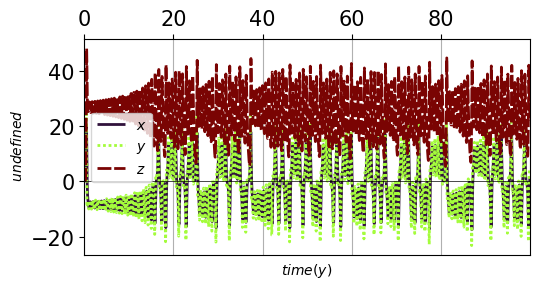

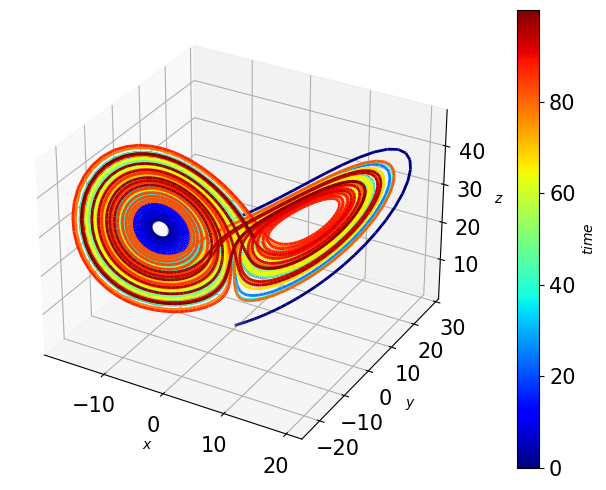

In [8]:
hub=pgm.Hub('LorenzSystem',preset='Canonical example')
hub.set_dparam('dt',0.01)
hub.run()
hub.plot()
pgm.plots.XYZ(hub,'x','y','z','time')

### Stochastic dynamics

solve $\dot{y} = y \sigma$, with sigma a Gaussian noise

The following fields are defined in the model but not it the library :
	- differential: ['y']
	- statevar: ['noisamp']
	- parameter: ['noise']
The following fields are identified as parameters :
	- independant : []
	- function of other parameters : []
The following variables are identified as auxilliary :
	 - differential : ['time']
	 - state variable : []
The following order has been determined for functions:
	- parameter: ['nt']
	- statevar: ['noisamp']
	- differential: ['y', 'time']

Changing Dimensions: ['nx']
Now nx has 10 sectors with names [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

time step 1000 / 1000


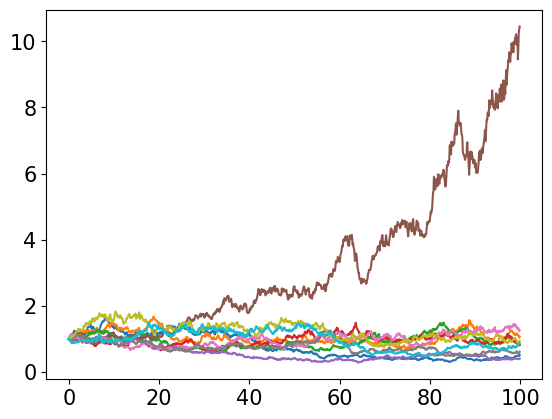

the system is calculating statsensitivity...
done


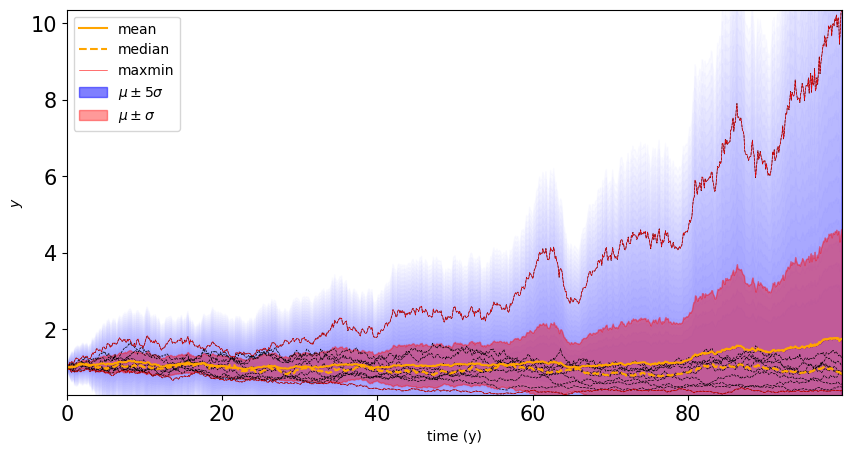

In [27]:
hub=pgm.Hub('stochastic')#,preset='10')
hub.set_dparam('nx',10)
hub.run()
hub.supplements['plot'](hub)
pgm.plots.Var(hub,'y',mode='sensitivity')

### Multiple regions Dynamics 

$\dfrac{\partial C}{\partial t} = -D \dfrac{\partial^2 C}{\partial x^2}$ 

Becomes : 

$\dfrac{\partial C}{\partial t} = -D [\nabla ( \nabla (C))]$ 

With : 

$C= \begin{pmatrix} C_1 \\ C_2 \\ ... \\ C_N \end{pmatrix}$

$\nabla= \begin{pmatrix}
 0 & (2dx)^{-1} & 0     & ... & 0\\ 
-(2dx)^{-1}     & \ddots& \ddots & 0 & ... \\ 
0         & \ddots& \ddots & \ddots & 0 \\
...         & ...& \ddots & \ddots & \ddots  \end{pmatrix}$

Modulation of $\nabla$ for network dynamics ( tweaked finite differences methods) 

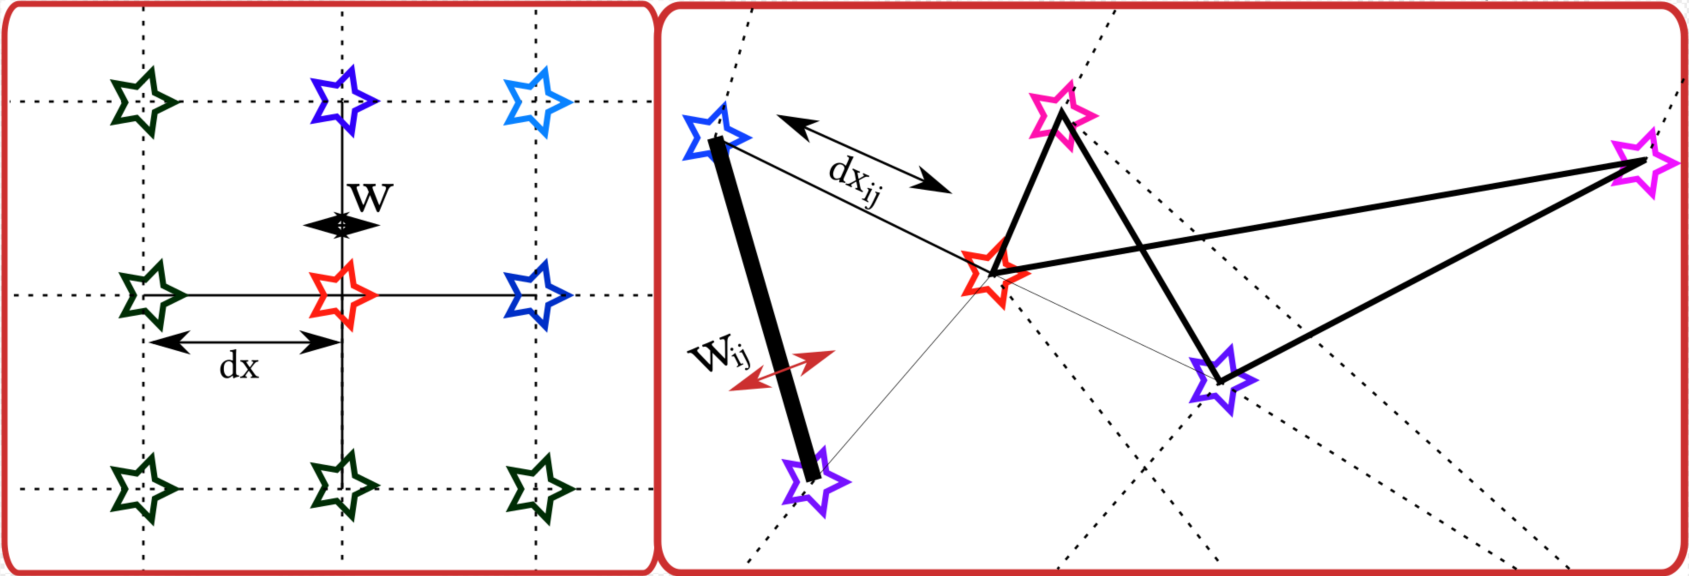

The following fields are defined in the model but not it the library :
	- differential: ['dC']
	- statevar: ['d2C', 'gradCx', 'lapC']
	- parameter: ['x', 'diffCoeff', 'v', 'nabla']
The following fields are identified as parameters :
	- independant : []
	- function of other parameters : []
The following variables are identified as auxilliary :
	 - differential : ['time']
	 - state variable : []
The following order has been determined for functions:
	- parameter: ['nt']
	- statevar: ['gradCx', 'lapC', 'd2C']
	- differential: ['dC', 'C', 'time']
############################################################
####################      SUMMARY       ####################
############################################################
Model       : PDE-Waves
Wave propagation with convection and diffusion in 1D
File        : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\Spatial\_model_PDE-Waves.py
####################       Fields       ####################
statevar        003 ['gradCx', 'lapC

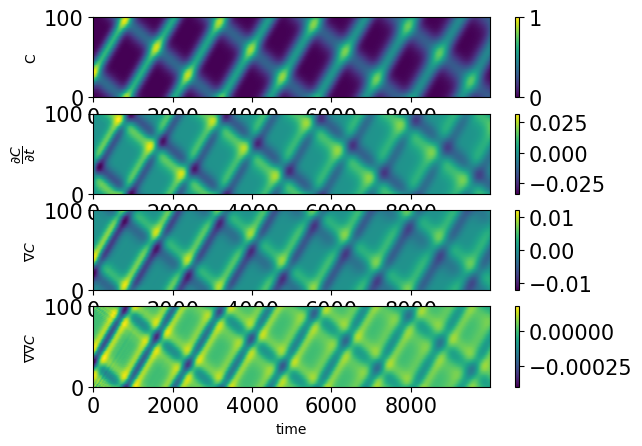

In [16]:
hub=pgm.Hub('PDE-Waves',preset='Basic')
hub.get_summary()
hub.run()
hub.supplements['Plot'](hub)

# <a id='toc3_'></a>[Your turn !](#toc0_)

## <a id='toc3_1_'></a>[Running the system on your own](#toc0_)
1. Reset your terminal
2. Load pygemmes 
3. Load a model (GoodwinFull) 
4. Look at the summary 
5. Change one parameter (for example, the interest rate)
6. Do a run 
7. Do a plot of only variables you want (for example employment, omega, d,N,L)
8. Do a 3D plot 
9. Calculate the cycles and show them one omega
10. Change the interest rate with 15 different values, and check the sensitivity of the system to it on employment
11. Load a preset, and plot it

Bonus : define a set of things you would be interested to do with pygemmes, either do it or share it here : https://github.com/DaluS/GEMMES/discussions/192

Then you can switch on creating your own models, with the tutorial `Model creation` is the same folder as this one

In [36]:
with open(path+'\\Tutorial-model.md', 'r') as fh: display(Markdown(fh.read()))

# Instructions in the readme

There are many ways to write a model in **pygemmes**, and one might fit your project better than other ones.
As there are already some stuff coded, you should always have an eye on :
    * Existing models ( table can be obtained using `pgm.get_available_models` )
    * Existing fields ( table can be obtained using `pgm.get_available_fields` or in `_models\_def_fields.py`
    * Existing functions ( list can be obtained using `pgm.get_available_functions` or in `_models\_def_functions.py`
That way you do not have to recode something that's already been added !

To explore the different approaches one can explore :
 1. `LorenzSystem` which contains all the basis (not using any external source)
 2. `Goodwin` as a Goodwin model using both the fields and functions library
 3. `Goodwin-CES` as an extension of `Goodwin` model

 # General file

* models are in the folder `models`
* models names have the nomenclature `_model_MODELNAME.py` : they are python file and you can do python operations on models !

The model file NEED to contains : 
* A docstring at the beginning (containing the description of your model)
* A dictionary called `_LOGICS` with a specific shape (see next part)
* A dictionnary called `_PRESETS` with a specific shape 

The model file CAN contains : 
* 

## The shape of `_LOGICS`

The model can contains : 
* differential variables
* state variables
* parameters 
* size of multisectoral shapes

The structure of `_LOGICS` will be : 
```
_LOGICS = {
    'diferential : {[...]},
    'statevar' : {[...]},
    'parameter' : {[...]},
    'size' : {[...]},
} # check there is not ',' at the end !
```
If you do not need one section, you can remove it ! a model with only differential will have : 
```
_LOGICS = {'diferential : {[...]},}
```

### How to define a field in a dictionnary 

To each "field" ( Capital, temperature, price, employment ) we can associate through a dictionnary : 
* a logic (if it is a state variable or a differential variable) called `func`
* a comment on how it is calculated (if it is a state variable or a differential variable) called `com` : is it the application of a definition, the differential logic of the reduced system, the consequence of a stock-flow consistency ? Is it exogenous ? 
* an initial value per default `initial` if its a differential equation
* a value (it its a parameter) called `value`
* a definition called `definition` : what this field represent ? 
* a unit system called `units` : is it a time, the inverse of a time, a money quantity ? The existing units are : [ ]
* a symbol called `symbol` : a latex writing if you want something fancy for your plots 
* a size if your system is a multisectoral/agent based one (multiple entities with the same logic in the system, that can interact with each others), as `size`. 
* if your field is in `size` and you want the index to have labels, you can put them with `list` ( example : `_LOGICS = {'size': {'Nprod': {'list':['firstsector','secondsector'],[...]},[...]},[...]}`)

That's a lot keys for each field, but you DO NOT need to write them every time ! The system will : 
* Try to find if the field is already defined somewhere, and if so will autofill with what he has found about it
* Fill the undefined keys with a default value (the symbol is the name, the comment is empty, the unit is `undefined`...) 

In consequence the field `K` defined as a differential variable $\dot{K} = I^r - \delta u K $ can be written as (I will explain the function later): 
```
'K': {
    'func': lambda Ir,delta,u,K: Ir-delta*u*K,
    'com': 'depreciation proportional to u',
    'definition': 'Productive capital in physical units',
    'units': 'units',
    'size': ['Nprod'],
    'initial': 2.7,
},
```
but also 
```
'K': {'func' : dotK},
```
And the system will do its best for the rest using informations in `pgm.get_available_fields()`. The more you give the better !
If some fields are needed but not specified, the system will try to find them on its own. For example in `delta` is never defined in any component of the `_LOGICS` of the model, he will look for it in the shared library `_def_fields`. 


### writing `func` the functions

Functions can be written two ways :
* classic functions defined somewhere else and called in `'func':`
* "lambda" (un-named function) 

`Pygemmes` is going to READ the function and the names of what you call. So put the right names inside ! For example : `func': lambda Ir,delta,u,K: Ir-delta*u*K`, the system will look at the fields named `Ir`, `delta`, `u`, `K` to compute the value. 

* If your field is in `differential`, it is assumed that what you define is its time derivative (like in the previous example)
* If your field is in `statevar`, it is assumed that what you define is the value.

I recommend using mostly lambda functions, it is more compact, easier to read and the system has more ease with them. But if you want you can do : 

```
def dotK(Ir,delta,u,K): 
    Kplus = Ir
    Kminus = delta*u*K
    return Kplus-Kminus

_LOGICS = {
    [...]
    'differential' : {
         [...]
         'K' { 'func' : dotK,
               [...],
             },
         [...],
         },
    [...]
    }
```

This is practical if you need complex multiline functions, or to call an external model



### The presets

Presets are pre-defined set of fields values and plots that a user can load to explore the properties of the model. As often in pygemmes, it is a dictionnary of dictionnary : 
```
_PRESETS= {
    'presetname_1': {
        'fields': {[...]},
        'com' : '''description of the preset```
        'plots' : {[...]},
    'presetname_2' : {[...]},
    [...]
    },
```
you can put as many preset as you want

#### Fields in presets
writing the fields is straightforward : any value you want to be specified is given as the key with an associated value : 
```
    [...]
    'fields': {'k0':-1,
               'dt':0.01,
               'omega':0.75,
               [...]
               },
    [...]
```

There can be some numerical keys in the preset : 
* 'nx' number of system in parrallel
* 'nr' regions solved at the same time
* 'Tmax' time of the simulation
* 'dt' timestep 

`fields` work the same way as `hub.set_dparam` : you can put multiple value at once on parrallel systems and so on !


#### plots in preset 
 
for each preset you can define multiple plots easy to access by the user. To do so, check `pgm.get_available_plots` : they give you the list of plots name you can put in your `plots` as keys. 
The value is a list of dictionnary : 
    * a list because each element of the list will be a separate plot (you can use the same time of plots multiple time for a same preset
    * dictionnaries working as `kwargs` of the plot function : you put each time what you want to put in your plot function. 
    
Example : 
```
    [...]
    'fields': {
            'timetrace': [{}],
            'nyaxis': [{'x': 'time',
                        'y': [['employment', 'omega'],
                              ['d'],
                              ['kappa', 'pi'],
                              ],
                        'idx':0,
                        'title':'',
                        'lw':2},
                       {'x': 'time',
                        'y': [['K', 'Y', 'I', 'Pi'],
                              ['inflation', 'g'],
                              ],
                        'idx':0,
                        'log':[False,False],
                        'title':'',
                        'lw':1}],
            'phasespace': [{'x': 'employment',
                            'y': 'omega',
                            'color': 'd',
                            'idx': 0}],
            '3D': [{'x': 'employment',
                    'y': 'omega',
                    'z': 'd',
                    'color': 'pi',
                    'cmap': 'jet',
                    'index': 0,
                    'title': ''}],
            'byunits': [{'title': '',
                         'lw': 2,       # optional
                         'idx': 0,      # optional
                         },  # optional
                        ],
        }
    [...]
```



### It's python language ! You can do wild things ! 

If your model is a fork (modification of) a previous model, you can import the logic of the previous model, and upgrade it. For example to go from a Goodwin to a Goodwin-Keen with inflation : 

More powerful functions are comming to do such thing (but can be found in `_model_CHIMES` as `Merge`
```
from pygemmes._models._model_Goodwin import _LOGICS as _LOGICS0
from copy import deepcopy
_LOGICS = deepcopy(_LOGICS0) # security
_GK_LOGICS = {
    'differential': {
        # Stock-flow consistency
        'D': {
            'func': lambda I, Pi: I - Pi,
            'com': 'Debt as Investment-Profit difference', },

        # Price Dynamics
        'w': Funcs.Phillips.salaryfromPhillips,
        'p': {
            'func': lambda p,inflation : p*inflation,
            'initial':1,
            'units': '$.Units^{-1}',
            'com': 'inflation driven'
        }
    },

    # Intermediary relevant functions
    'statevar': {
        # Stock-flow consistency
        'Pi': {
            'func': lambda w, GDP, L, r, D: GDP - w * L - r * D,
            'com': 'Profit for production-Salary-debt func', },

        # Intermediary
        'kappa': Funcs.Kappa.exp,
        'inflation': Funcs.Inflation.markup,
        'I': Funcs.Kappa.ifromkappa,
        'd': Funcs.Definitions.d,

        # Growth manually coded
        'g': {
            'func': lambda Ir, K, delta: (Ir - K * delta)/K,
            'com': 'relative growth rate'},
    },
    'parameter': {},
    'size': {},
}

# We add them explicitely
for category, dic in _GK_LOGICS.items():
    for k, v in dic.items():
        _LOGICS[category][k] = v
```

That way fields not modified from a Goodwin to a Goodwin-Keen do not have to be modified. Note that the consumption is not defined in the Goodwin file (nor here) so it does not have to be modified



### Calling an external module

Let's say you have a climate solver that gives you a temperature `T`, and that you can feed with emissions `E`, and you have a binding of your model `MODEL`

```
def TfromE(E,time): 
    ### Initialize your model
    if time==0:
        MODEL.start()
    ### If Pygemmes is too much in advance in time, compute next iteration
    if time>MODEL['simulatedtime']:
        MODEL.run('Emissions'=E)
    T=MODEL.give('Temperature',time)
    return T   
```

Of course the binding needs to have `MODEL` correctly coded. 
As pygemmes use an RK-4 solver, `MODEL.give` must not necessary compute the iteration at each timestep (depends of your solver on the other side.